In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df.iloc[:,2:]

In [5]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [6]:
X = df.iloc[:, [0,1]]
y = df.iloc[:, 2]

## Train Test Split

In [7]:
from sklearn.model_selection import train_test_split


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=69)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((320, 2), (80, 2), (320,), (80,))

## Standard Scaler

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
# fit the scaler with train dataset only, it will learn parameters (mean and sd)
scaler.fit(X_train)

#
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
scaler.mean_

array([3.766875e+01, 6.981875e+04])

In [13]:
X_train

,Age,EstimatedSalary
87,28,85000
86,24,55000
76,18,52000
4,19,76000
317,35,55000
...,...,...
49,31,89000
90,22,81000
107,27,89000
203,41,71000


In [14]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns= X_test.columns)

In [15]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,320.0,320.0
mean,37.7,69818.8
std,10.3,33469.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,45.2,88000.0
max,60.0,150000.0


In [16]:
np.round(X_test.describe())

,Age,EstimatedSalary
count,80.0,80.0
mean,38.0,69438.0
std,11.0,36722.0
min,19.0,18000.0
25%,28.0,43000.0
50%,37.0,62500.0
75%,46.0,86250.0
max,59.0,150000.0


In [17]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,320.0,320.0
mean,-0.0,-0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.1,0.0
75%,0.7,0.5
max,2.2,2.4


## Effect of Scaling

Text(0.5, 1.0, 'After Standard Scaling')

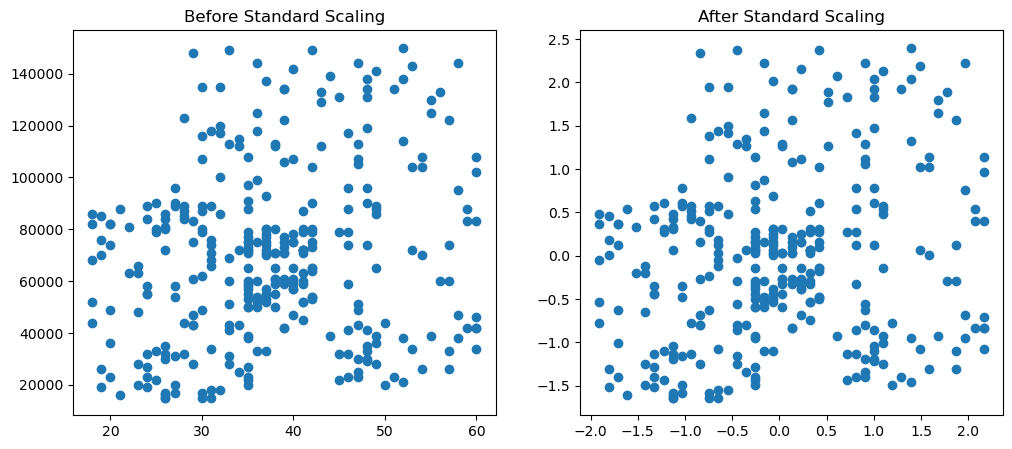

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(X_train["Age"], X_train["EstimatedSalary"])
ax1.set_title("Before Standard Scaling")
ax2.scatter(X_train_scaled["Age"], X_train_scaled["EstimatedSalary"])
ax2.set_title("After Standard Scaling")


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

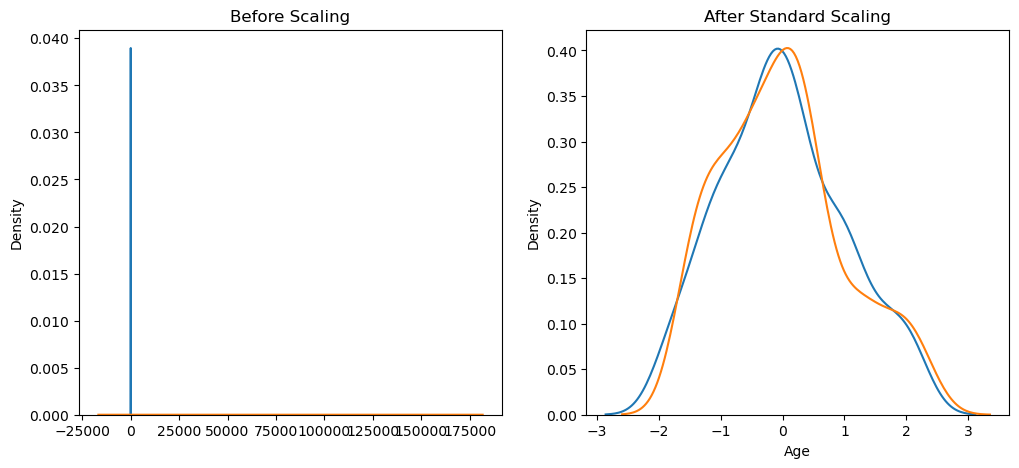

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train["Age"], ax=ax1)
sns.kdeplot(X_train["EstimatedSalary"], ax=ax1)
ax1.set_xlabel("")

# after scaling
ax2.set_title("After Standard Scaling")
sns.kdeplot(data= X_train_scaled, x="Age", ax=ax2)
sns.kdeplot(data=X_train_scaled, x="EstimatedSalary", ax=ax2)
plt.show()

## Comparison of distributions

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


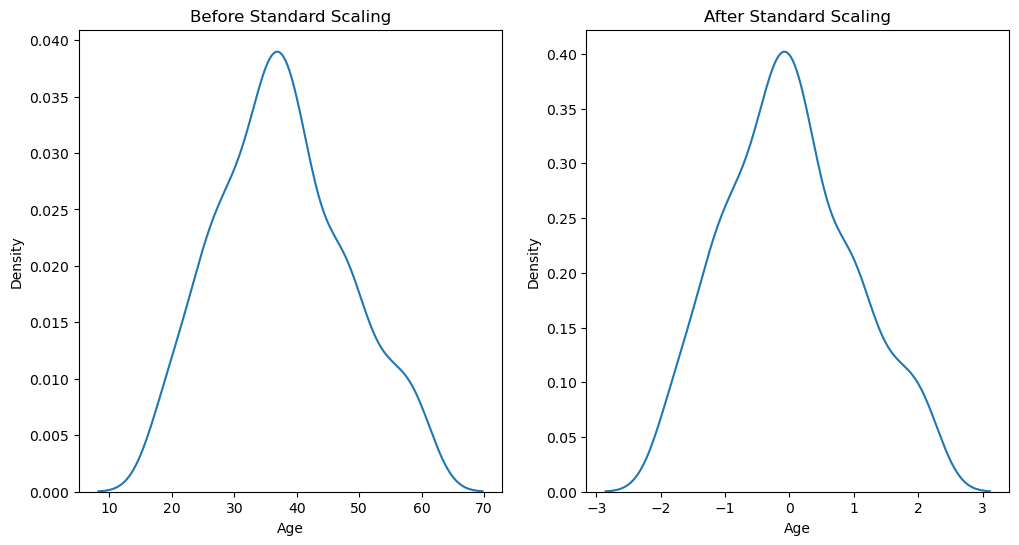

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.set_title("Before Standard Scaling")
sns.kdeplot(data= X_train, x="Age", ax=ax1)
ax2.set_title("After Standard Scaling")
sns.kdeplot(data=X_train_scaled, x="Age", ax=ax2)
plt.show()


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


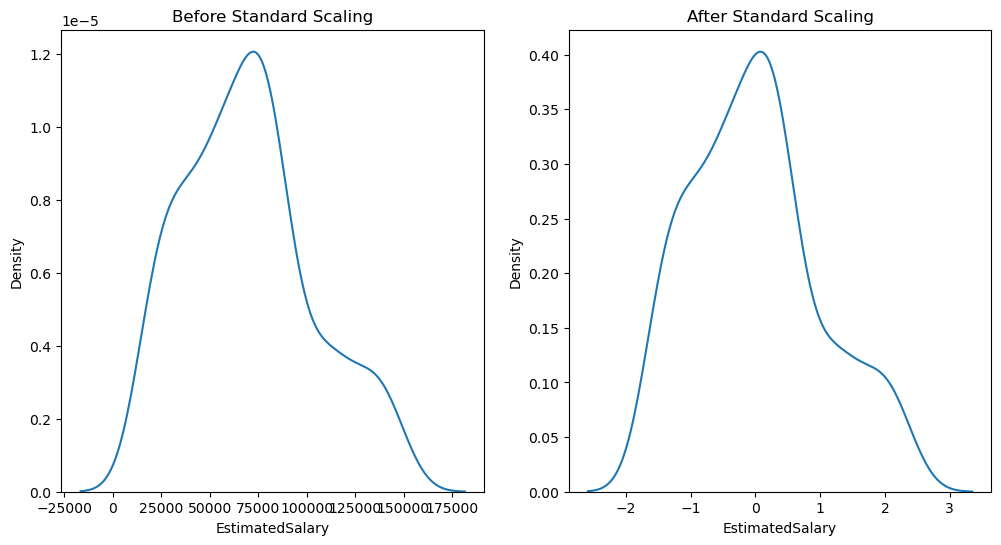

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.set_title("Before Standard Scaling")
sns.kdeplot(data= X_train, x="EstimatedSalary", ax=ax1)
ax2.set_title("After Standard Scaling")
sns.kdeplot(data=X_train_scaled, x="EstimatedSalary", ax=ax2)
plt.show()

## Why scaling is important?

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr = LogisticRegression()
scaled_lr = LogisticRegression()

In [30]:
lr.fit(X_train, y_train)
scaled_lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [31]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [34]:
y_pred = lr.predict(X_test)
y_pred_scaled = scaled_lr.predict(X_test_scaled)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.5875
Scaled 0.7875


In [42]:
lr.score(X_test, y_test)


0.5875

In [44]:
scaled_lr.score(X_test_scaled, y_test)

0.7875

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [47]:
dt.fit(X_train, y_train)
dt_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [48]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)


In [50]:
print("Accuracy on actual data:", accuracy_score(y_test, y_pred))
print("Accuracy on scaled data:", accuracy_score(y_test, y_pred_scaled))

Accuracy on actual data: 0.825
Accuracy on scaled data: 0.825


In [52]:
print(dt.score(X_test, y_test))
print(dt_scaled.score(X_test_scaled, y_test))

0.825
0.825
